# Data Preparation

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import warnings
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')
%matplotlib inline

Make sure the datefields in the data are parsed as datetime(64)

In [3]:
mrsa_neg = pd.read_csv("../deidentified/MRSA_neg.csv", parse_dates=['COLLECTED','ADM_DATE'])
mrsa_pos = pd.read_csv("../deidentified/MRSA_pos.csv", parse_dates=['COLLECTED','ADM_DATE'])

Combine data from positive and negative samples and check for duplicates

In [4]:
MRSA = pd.concat([mrsa_pos, mrsa_neg], ignore_index=True)
MRSA.ACCN.duplicated().value_counts()

False    21849
True        78
Name: ACCN, dtype: int64

Remove duplicates

In [5]:
noDupesMRSA = MRSA.drop_duplicates(subset=['ACCN','COLLECTED','coded_uid','coded_mrn'])
noDupesMRSA.loc[:,'ACCN'] = noDupesMRSA.loc[:,'ACCN'].apply(lambda x: int(x.replace("-","")))
noDupesMRSA.ACCN.duplicated().value_counts()

False    21849
Name: ACCN, dtype: int64

In [6]:
noDupesMRSA

,ACCN,ADM_DATE,COLLECTED,E_LOC_FACILITY_DISP,E_MED_SERVICE_DISP,MS_BODY_SITE_DISP,MS_COLLECT_LOC_NURSE_UNIT_DISP,MS_SERVICE_RESOURCE_DISP,MS_SOURCE_DISP,ORDERABLE,POSITIVE_IND,P_SEX_DISP,REPORTED,RESPONSE_TEXT,coded_mrn,coded_uid
0,4110010010,2010-12-15,2011-01-01,WESTMEAD HOSP,Haematology,.Peripheral,WE W.C5A,WMD Epicentre,Blood,Blood Culture,1,Female,Final,Methicillin resistant Staphylococcus aureus,3814,1178
1,4110010980,2010-07-12,2011-01-01,WESTMEAD HOSP,Haematology,Combine,WE W.E3B,WMD Routine Micro Bench,Screen,MRSA Detection,1,Female,Final,Methicillin resistant Staphylococcus aureus,2929,3148
2,4110011412,2011-01-01,2011-01-01,WESTMEAD HOSP,NaN,Toe 1st Big L,WE Emergency Dept,WMD Routine Micro Bench,Swab,Culture Wound,1,Male,Final,Methicillin resistant Staphylococcus aureus,569,2595
3,4110020009,2010-12-15,2011-02-01,WESTMEAD HOSP,Haematology,.Peripheral,WE W.C5A,WMD Epicentre,Blood,Blood Culture,1,Female,Final,Methicillin resistant Staphylococcus aureus,3814,1178
4,4110020804,2011-02-01,2011-02-01,WESTMEAD HOSP,NaN,Hip Unspecified,WE C.PACC,WMD Routine Micro Bench,Swab,Culture Wound,1,Male,Final,Methicillin resistant Staphylococcus aureus,2810,2170
5,2110020862,2011-01-01,2011-02-01,BLACKTOWN HOSP,"Renal Medicine, nec",Combine,BL W.B41 Med 2,WMD Routine Micro Bench,Screen,MRSA Detection,1,Male,Final,Methicillin resistant Staphylococcus aureus,1396,946
6,2110021661,2011-02-01,2011-02-01,BLACKTOWN HOSP,NaN,Groin R,BL Emergency Dept,WMD Routine Micro Bench,Swab,Culture Wound,1,Female,Final,Methicillin resistant Staphylococcus aureus,4699,1985
7,2110030280,2010-12-14,2011-03-01,BLACKTOWN HOSP,Acute Geriatrics,NaN,BL W.B26 ICU,WMD Routine Micro Bench,Screen,MRSA Detection,1,Male,Final,Methicillin resistant Staphylococcus aureus,4781,2105
8,2110030838,2009-08-06,2011-03-01,BLACKTOWN HOSP,Acute Geriatrics,NaN,BL W.B26 ICU,WMD Routine Micro Bench,Screen,MRSA Detection,1,Male,Final,Methicillin resistant Staphylococcus aureus,1533,1346
9,2110030846,2010-12-11,2011-03-01,BLACKTOWN HOSP,"Cardiology, nec",NaN,BL W.B26 ICU,WMD Routine Micro Bench,Screen,MRSA Detection,1,Male,Final,Methicillin resistant Staphylococcus aureus,4006,3930


# Establishing a Baseline Prediction

0.5730239370222894

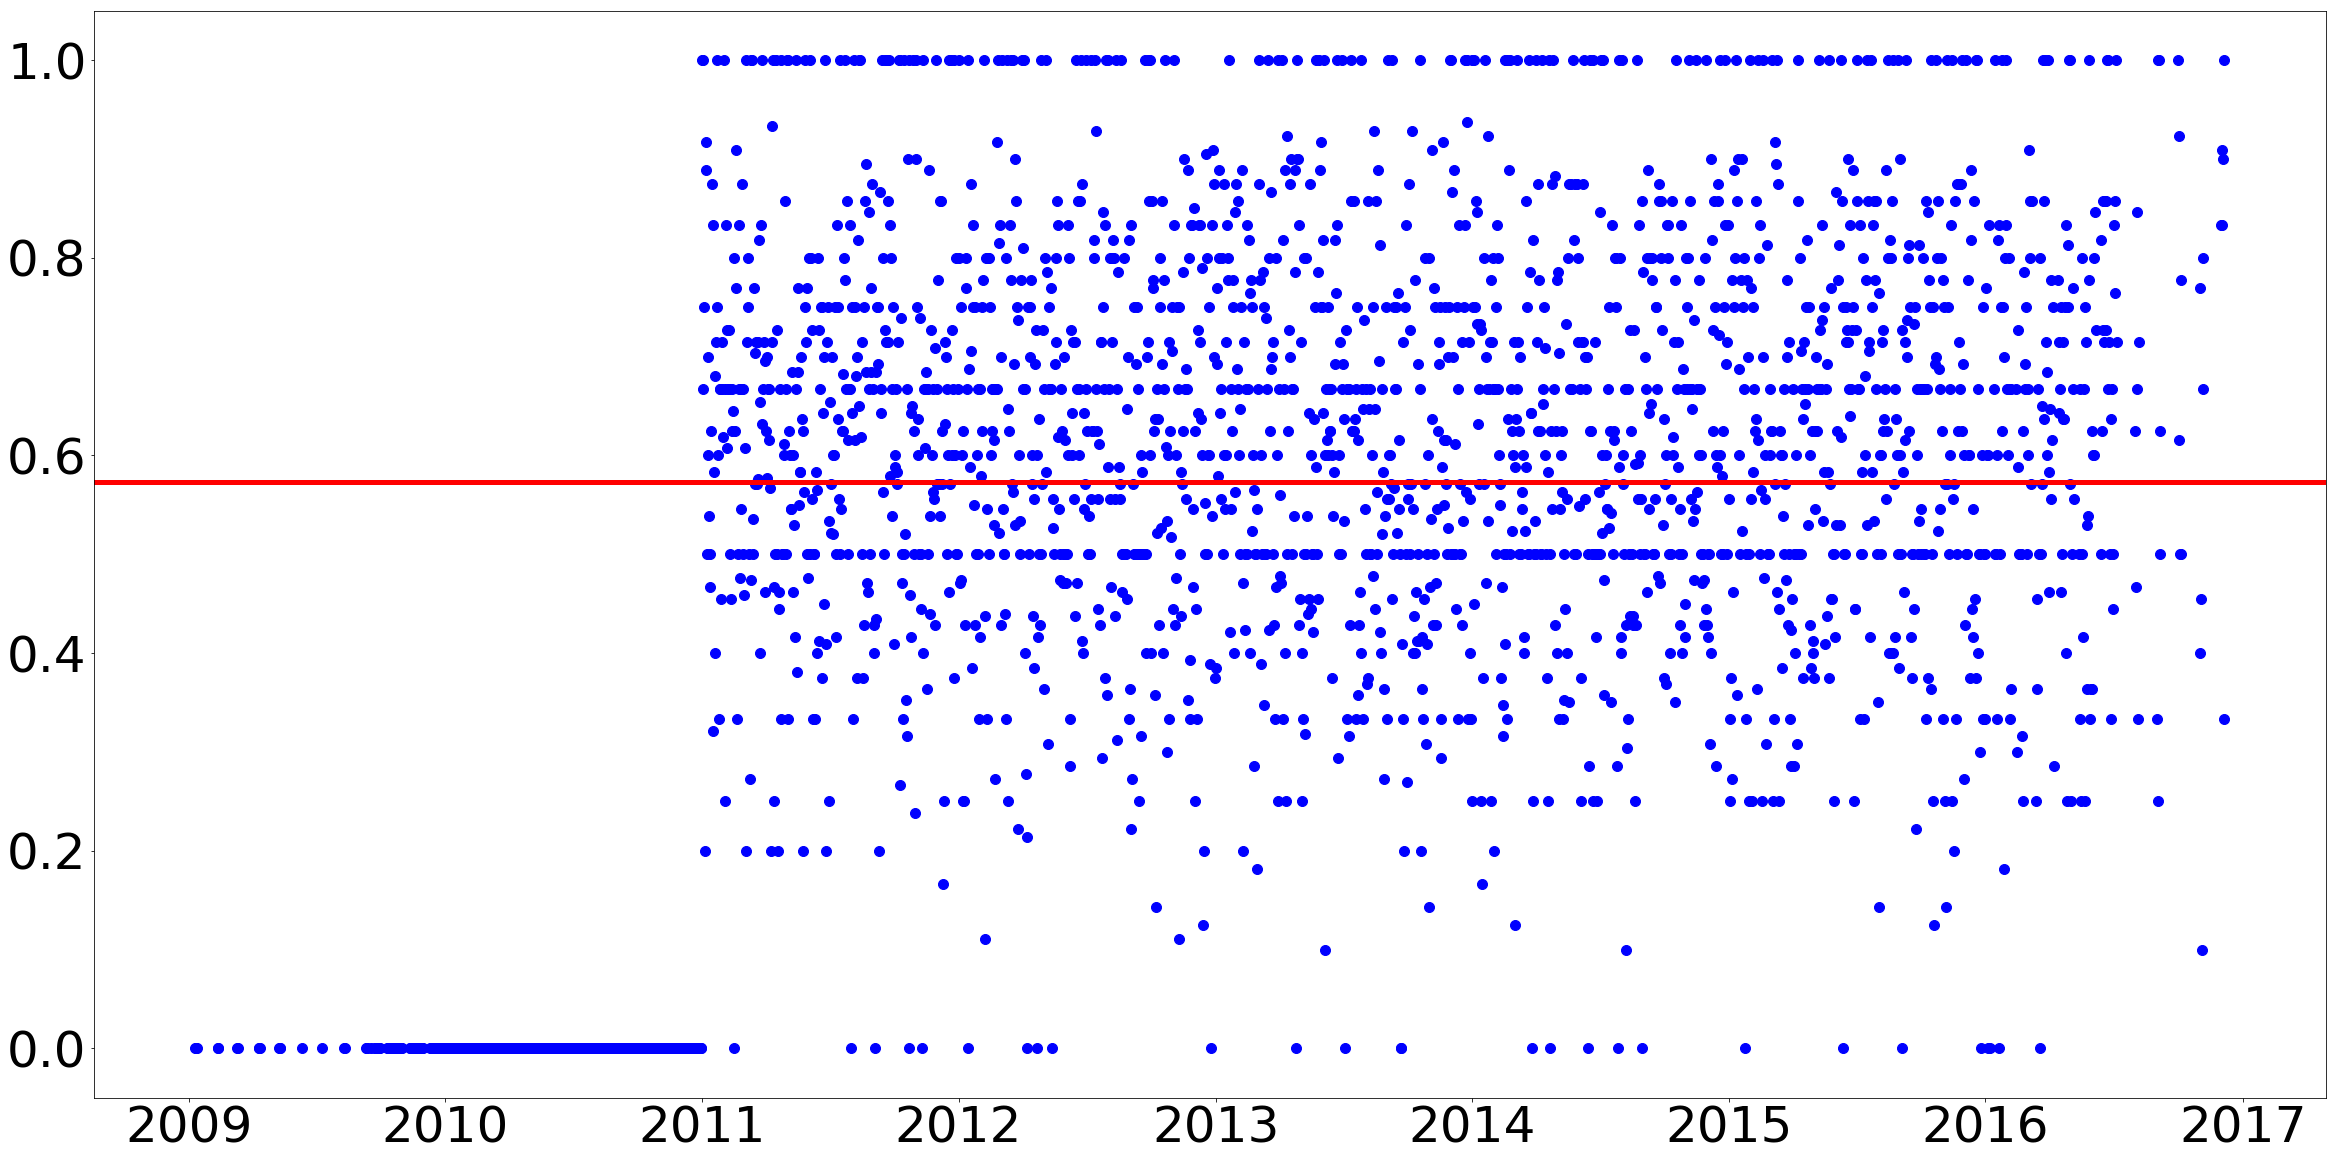

In [7]:
#Group by date collected
grouped_by_COLLECTED = noDupesMRSA.POSITIVE_IND.groupby(noDupesMRSA.COLLECTED)
INFECTION_NUMBERS = grouped_by_COLLECTED.sum()
SAMPLE_NUMBERS = grouped_by_COLLECTED.size()
INFECTION_RATES = INFECTION_NUMBERS/SAMPLE_NUMBERS
plt.figure(figsize=(40,20))
plt.rc('xtick', labelsize=50) 
plt.rc('ytick', labelsize=50) 
plt.plot(INFECTION_RATES, 'bo', ms=10)
#Total MRSA infections / Total number of samples
overall_infection_rate = 1.0*INFECTION_NUMBERS.sum()/SAMPLE_NUMBERS.sum()
plt.axhline(y=overall_infection_rate, color='r', linestyle='-', linewidth=5.0)
overall_infection_rate

#Plot of daily infection rate in blue, overall infection rate in red

We need to establish a baseline prediction from which we can benchmark the efficacy of the various models we will use.
Suppose we were to guess a 57.3% likelyhood of MRSA infection for each day. Let us use the mean absolute difference with respect to the actual daily infection rates to calculate this baseline cost.

In [8]:
# Use mean absolute difference as a cost function
def calculateCost(actual_data, predicted_data):
    return (abs(actual_data - predicted_data)/actual_data.size).sum()

calculateCost(INFECTION_RATES, overall_infection_rate)

0.2336300382460797

# Simple Moving Window Approach

In [9]:
def movingWindowCost(window_size):
    window_infections = INFECTION_NUMBERS.shift().rolling(window=window_size).sum()
    window_samples = SAMPLE_NUMBERS.shift().rolling(window=window_size).sum()
    moving_window_model = (window_infections/window_samples)[window_size:]
    ir = INFECTION_RATES[window_size:]
    cost = calculateCost(ir,moving_window_model)
    return (moving_window_model, cost)


Let us determine an a good window size to use

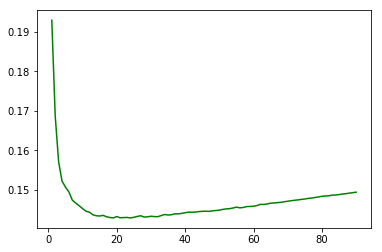

In [10]:
windowSizeVsCost = pd.Series()
for i in range(1,91):
    windowSizeVsCost.set_value(i,movingWindowCost(i)[1])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(windowSizeVsCost, color='g')
plt.show()

In [11]:
( windowSizeVsCost.idxmin(), min(windowSizeVsCost))

(24, 0.14296993302249567)

So it seems that a 24-day moving window is optimal, with a cost of 0.143, a significant improvement upon our baseline

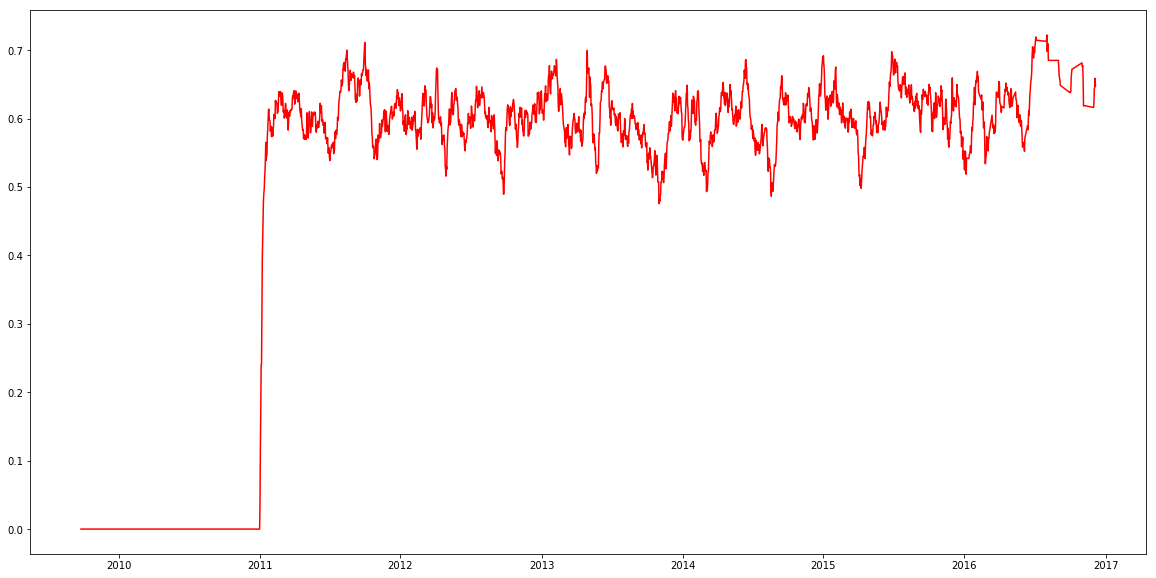

In [12]:
(moving_window_model, cost) = movingWindowCost(24)
plt.figure(figsize=(20,10)) 
plt.plot(moving_window_model, color='r')
plt.show()

# Using More Features

We will now explore additional features by joining on the other data provided.

In [13]:
RLB = pd.read_csv("../deidentified/RLB.csv", parse_dates=['collection_dt','admit_dt'])
RLB.rename(columns={'accession':'ACCN'}, inplace=True)
RLB

,facility,hospital,collection_ward,coded_mrn,ACCN,collection_dt,genotype,admit_dt,first_pos_dt,last_neg_dt,predicted_mlst,predicted_sccMec,predicted_spa,Antibiogram,tests,specsite
0,D224,WMD,0.0,NaN,4150010001,2015-10-05 00:00:00,37634,nan,NaN,NaN,93,IV,t202,Not Done,8.0,NaN
1,D224,WMD,0.0,NaN,4160053266,2016-05-01 00:00:00,280841,nan,NaN,NaN,239,III,t037,Nil #,0.0,NaN
2,D224,WMD,NaN,NaN,0,2011-06-26 00:00:00,280845,26/06/2011 0:00,NaN,NaN,239,III,t037,CIP CLI ERY GEN COT,NaN,NaN
3,D224,WMD,0.0,1.0,20,2012-11-01 00:00:00,37248,nan,NaN,NaN,22,IV.3.1.2,t005,GEN COT,7.0,COMBINE
4,D224,WMD,0.0,2.0,28,2012-12-01 00:00:00,65794,nan,NaN,NaN,5,NaN,t3979,Nil,0.0,NaN
5,D224,WMD,NaN,3.0,4000000041,2011-12-09 00:00:00,37248,12/09/2011 0:00,NaN,NaN,22,IV.3.1.2,t005,GEN COT,NaN,NICU Screen
6,D224,WMD,0.0,4.0,56,2012-01-20 00:00:00,308034,nan,NaN,NaN,1,IV,t127,Nil,0.0,NaN
7,D224,WMD,NaN,5.0,4000000066,2011-12-09 00:00:00,37248,12/09/2011 0:00,NaN,NaN,22,IV.3.1.2,t005,GEN COT,NaN,NICU Screen
8,D224,WMD,0.0,6.0,99,2012-01-23 00:00:00,308034,nan,NaN,NaN,1,IV,t127,Nil,0.0,NaN
9,D224,WMD,NaN,9.0,4000000168,2011-09-21 00:00:00,427152,21/09/2011 0:00,NaN,NaN,772,V,t657,CIP ERY GEN COT,NaN,NICU Screen


In [14]:
#sed 's/       /,/g' ../deidentified/vBedDays.csv > ../deidentified/vBedDays_Cleaned.csv
vBedDays = pd.read_csv("../deidentified/vBedDays_Cleaned.csv", parse_dates=['start_dt','end_dt'])
vBedDays

,facility,ward,year,month,start_dt,end_dt,bed_hours,separations
0,D224,NaN,2012,2,2012-01-02,2012-01-03,0,NaN
1,D224,NaN,2012,9,2012-01-09,2012-01-10,0,NaN
2,D224,NaN,2013,5,2013-01-05,2013-01-06,5,NaN
3,D224,NaN,2014,7,2014-01-07,2014-01-08,5,NaN
4,D224,NaN,2014,9,2014-01-09,2014-01-10,0,NaN
5,D224,A3C,2012,1,2012-01-01,2012-01-02,11242,NaN
6,D224,A3C,2012,2,2012-01-02,2012-01-03,10689,NaN
7,D224,A3C,2012,3,2012-01-03,2012-01-04,11390,NaN
8,D224,A3C,2012,4,2012-01-04,2012-01-05,11110,NaN
9,D224,A3C,2012,5,2012-01-05,2012-01-06,11123,NaN


In [15]:
ls ../deidentified/

MRSA_neg.csv           vBedClean_Cleaned.csv  vVisits-mrn2.csv
MRSA_pos.csv           vBedDays.csv           vVisits-uid.csv
RLB.csv                vBedDays_Cleaned.csv
vBedClean.csv          vCards.csv


In [16]:
vBedClean = pd.read_csv("../deidentified/vBedClean_Cleaned.csv", parse_dates=['date_requested','date_cleaner_assigned','date_completed'])

In [17]:
vBedClean

,facility,ward,bed,status,status_display,bed_infected,clean_level,priority,note,date_requested,date_cleaner_assigned,date_completed,requested_by,time_taken
0,D224,B3C,B3C048,3,Occupied,0,Normal Discharge Clean,2.0,NaN,2013-12-29 14:41:00,2013-12-29 15:31:00,2013-12-29 15:45:00,B3C,64.0
1,D224,B3C,B3C040,3,Occupied,0,Normal Discharge Clean,2.0,NaN,2013-12-29 15:02:00,2013-12-29 15:04:00,2013-12-29 15:31:00,B3C,29.0
2,D224,B3C,B3C030,3,Occupied,0,Normal Discharge Clean,2.0,NaN,2013-12-31 12:30:00,2013-12-31 13:01:00,2013-12-31 13:13:00,B3C,43.0
3,D224,B3C,B3C046,3,Occupied,0,Normal Discharge Clean,2.0,NaN,2013-12-31 13:22:00,2013-12-31 13:37:00,2013-12-31 13:37:00,B3C,15.0
4,D224,B3C,B3C058,3,Occupied,2,Terminal Clean with Viraclean,2.0,NaN,2013-12-31 17:16:00,2013-12-31 18:36:00,2013-12-31 19:32:00,B3C,136.0
5,D224,B3C,B3C044,3,Occupied,0,Normal Discharge Clean,3.0,NaN,2014-01-01 15:01:00,2014-01-01 15:09:00,2014-01-01 15:33:00,B3C,32.0
6,D224,B3C,B3C041,3,Occupied,0,Normal Discharge Clean,3.0,NaN,2014-01-01 15:01:00,2014-01-01 15:09:00,2014-01-01 15:33:00,B3C,32.0
7,D224,B3C,B3C066,3,Occupied,2,Terminal Clean with Viraclean,3.0,Respiratory precautions.,2014-01-01 17:29:00,2014-01-01 17:41:00,2014-01-01 18:22:00,B3C,53.0
8,D224,B3C,B3C031,3,Occupied,0,Normal Discharge Clean,3.0,NaN,2014-01-01 17:33:00,2014-01-01 18:20:00,2014-01-01 18:36:00,B3C,63.0
9,D224,B3C,B3C046,3,Occupied,0,Normal Discharge Clean,2.0,NaN,2014-02-01 14:27:00,2014-02-01 14:34:00,2014-02-01 14:42:00,B3C,15.0


In [18]:
vCards = pd.read_csv("../deidentified/vCards.csv", parse_dates=['col_date','family_date','update_dt'])

In [19]:
vCards

,record_id,record_status,isolate_id,visit_facility,visit_id,coded_uid,col_date,organism,acquisition,origin,...,org_variant,update_dt,update_user,clab,qmpi2,qmpi3,significance,outcome,indicator_comment,ltcf
0,6,R,0,NaN,NaN,14976.0,2008-01-14,MRSA,NaN,OLDH,...,HA,2009-03-13 09:24:00,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,R,0,NaN,NaN,8988.0,2008-01-23,MRSA,NaN,OLDH,...,HA,2009-03-13 09:24:00,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,R,0,NaN,NaN,8411.0,2008-09-01,MRSA,NaN,OLDH,...,HA,2009-03-13 09:24:00,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,R,0,NaN,NaN,8411.0,2008-01-14,MRSA,NaN,OLDH,...,HA,2009-03-13 09:24:00,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,R,0,NaN,NaN,8411.0,2008-01-13,MRSA,NaN,OLDH,...,HA,2009-03-13 09:24:00,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11,R,0,NaN,NaN,14222.0,2008-04-02,MRSA,NaN,OLDH,...,HA,2009-03-13 09:24:00,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12,S,0,NaN,NaN,9714.0,2008-07-02,MRSA,NaN,OLDH,...,HA,2009-03-13 09:24:00,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,13,R,0,NaN,NaN,9714.0,2008-01-18,MRSA,NaN,OLDH,...,HA,2009-03-13 09:24:00,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,14,R,0,NaN,NaN,8325.0,2008-01-14,MRSA,NaN,OLDH,...,HA,2009-03-13 09:24:00,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,16,R,0,NaN,NaN,6473.0,2007-10-18,MRSA,NaN,OLDH,...,HA,2009-03-13 09:24:00,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
vVisits_mrn2 = pd.read_csv('../deidentified/vVisits-mrn2.csv', parse_dates=['admit_dt','discharge_dt','ward_admit_dt','ward_discharge_dt'])
vVisits_mrn2

,coded_uid,facility,coded_mrn,visit_id,admit_dt,discharge_dt,pat_class,ward,bed,ward_admit_dt,ward_discharge_dt,pflag
0,12210,D224,5445,2116992,2012-04-23 16:16:00,2012-04-23 21:15:00,I,WEM,WEM004,2012-04-23 19:06:00,2012-04-23 21:15:00,NaN
1,5493,D224,330,2116216,2012-04-22 16:08:00,2012-04-28 10:03:00,I,EMG,WEDT01,2012-04-23 19:08:00,2012-04-23 19:15:00,NaN
2,9346,D224,3221,2116439,2012-04-22 14:27:00,2012-04-26 19:29:00,I,WEM,WEMT01,2012-04-23 10:40:00,2012-04-23 19:09:00,NaN
3,9346,D224,3221,2116439,2012-04-22 14:27:00,2012-04-26 19:29:00,I,WEM,WEM005,2012-04-23 19:09:00,2012-04-24 00:14:00,NaN
4,5493,D224,330,2116216,2012-04-22 16:08:00,2012-04-28 10:03:00,I,D3A,D3A011,2012-04-23 19:15:00,2012-04-28 10:03:00,NaN
5,6440,D224,2632,2116943,2012-04-23 13:27:00,2012-07-05 16:35:00,I,EMG,WEDT03,2012-04-23 22:27:00,2012-04-24 05:38:00,NaN
6,13980,D224,3810,2108639,2012-10-04 18:28:00,2012-05-22 21:15:00,I,A6A,A6A021,2012-04-23 23:41:00,2012-04-25 14:30:00,NaN
7,7191,D224,2933,2111161,2012-04-14 16:33:00,2012-04-26 16:35:00,I,A6A,A6A024,2012-04-23 23:42:00,2012-04-25 14:45:00,NaN
8,9346,D224,3221,2116439,2012-04-22 14:27:00,2012-04-26 19:29:00,I,A6A,A6A012,2012-04-24 00:14:00,2012-04-26 10:28:00,NaN
9,9142,D224,5050,2117130,2012-04-23 20:26:00,2012-04-27 16:38:00,I,A5A,A5AT13,2012-04-23 20:26:00,2012-04-24 02:47:00,NaN


In [21]:
vVisits_mrn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107878 entries, 0 to 107877
Data columns (total 12 columns):
coded_uid            107878 non-null int64
facility             107878 non-null object
coded_mrn            107878 non-null int64
visit_id             107878 non-null int64
admit_dt             107878 non-null datetime64[ns]
discharge_dt         107689 non-null datetime64[ns]
pat_class            107878 non-null object
ward                 107877 non-null object
bed                  107877 non-null object
ward_admit_dt        107878 non-null datetime64[ns]
ward_discharge_dt    107801 non-null datetime64[ns]
pflag                0 non-null float64
dtypes: datetime64[ns](4), float64(1), int64(3), object(4)
memory usage: 9.9+ MB


In [22]:
vVisits_uid = pd.read_csv("../deidentified/vVisits-uid.csv").iloc[:,range(12)].dropna(subset=['ward_discharge_dt'])

In [23]:
vVisits_mrn2['Time_Spent_In_Ward'] = (vVisits_mrn2['ward_discharge_dt'] - vVisits_mrn2['ward_admit_dt'])#.apply(lambda x: x.total_seconds)
vVisits_mrn2['Time_Spent_In_Facility'] = (vVisits_mrn2['discharge_dt'] - vVisits_mrn2['admit_dt'])#.apply(lambda x: x.total_seconds)

In [24]:
pd.Index(vVisits_mrn2.ward.unique())


Index(['WEM', 'EMG', 'D3A', 'A6A', 'A5A', 'B4C', 'A5C', 'BTD', 'ARD', 'A6B',
       'DAY', 'PDU', 'C3C', 'D4C', 'B5B', 'WHE', 'WAE', 'B3C', 'A4C', 'E3C',
       'C5A', 'B5A', 'D3C', 'C4C', 'B3A', 'D4B', 'GDH', 'A5B', 'END', 'A3C',
       'WFT', 'B5C', 'D4A', 'E3B', 'D5C', 'WNC', 'C4A', 'C5C', 'WHW', 'WCC',
       'E3A', 'W5P', 'A4D', 'WBU', 'A6C', 'WPN', 'CCL', 'B5D', 'WNB', 'BIU',
       'C4B', 'A4A', 'AMB', 'WAA', 'WHH',   nan, 'WUC', 'WTL', 'WSC', 'BRI',
       'WCS'],
      dtype='object')

In [25]:
vVisits_uid.ward.value_counts().size

68

In [26]:
wards = vVisits_mrn2[['coded_mrn', 'ward', 'ward_admit_dt','ward_discharge_dt']]#.sort_values('coded_mrn')
wardIndex = pd.Index(vVisits_mrn2.ward.unique()).drop(None)
zeroes = np.zeros(shape=(wards.shape[0],wardIndex.size))
wards2 = pd.DataFrame(zeroes, columns=wardIndex)
wards = pd.concat([wards,wards2], axis=1)
pd.options.display.max_columns = 70
wards = wards.sort_values('coded_mrn').reset_index(drop=True)
wards.set_value(index=22289,col='ward',value='ARD')
wards



,coded_mrn,ward,ward_admit_dt,ward_discharge_dt,WEM,EMG,D3A,A6A,A5A,B4C,A5C,BTD,ARD,A6B,DAY,PDU,C3C,D4C,B5B,WHE,WAE,B3C,A4C,E3C,C5A,B5A,D3C,C4C,B3A,D4B,GDH,A5B,END,A3C,WFT,B5C,D4A,E3B,D5C,WNC,C4A,C5C,WHW,WCC,E3A,W5P,A4D,WBU,A6C,WPN,CCL,B5D,WNB,BIU,C4B,A4A,AMB,WAA,WHH,WUC,WTL,WSC,BRI,WCS
0,11,D4C,2013-06-18 14:32:00,2013-06-21 12:09:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11,PDU,2013-06-21 12:09:00,2013-06-21 12:11:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11,WHE,2013-10-06 19:40:00,2013-11-06 13:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,PDU,2012-11-07 16:08:00,2012-11-07 16:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11,E3B,2012-05-07 15:45:00,2012-05-07 15:57:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,11,B4C,2013-11-06 13:00:00,2013-06-18 14:32:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,11,B5B,2012-05-07 15:57:00,2012-06-07 16:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,11,EMG,2012-06-21 15:27:00,2012-06-21 20:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,11,EMG,2013-10-06 12:46:00,2013-10-06 19:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,11,PDU,2013-06-21 12:09:00,2013-06-21 12:09:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
prevMrn = None
for i in range(wards.shape[0]):
    row = wards.loc[i,:]
    if row['coded_mrn'] == prevMrn:
        wards.iloc[i,4:] = wards.iloc[i-1,4:]
    try:
        wards.set_value(index=i,col=row['ward'],value=1)
    except ValueError as e:
        print("index is " + str(i))
        print(e)
    prevMrn = row['coded_mrn']

In [28]:
noDupesMRSA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21849 entries, 0 to 21926
Data columns (total 16 columns):
ACCN                              21849 non-null int64
ADM_DATE                          21839 non-null datetime64[ns]
COLLECTED                         21849 non-null datetime64[ns]
E_LOC_FACILITY_DISP               21849 non-null object
E_MED_SERVICE_DISP                17480 non-null object
MS_BODY_SITE_DISP                 19915 non-null object
MS_COLLECT_LOC_NURSE_UNIT_DISP    21811 non-null object
MS_SERVICE_RESOURCE_DISP          21849 non-null object
MS_SOURCE_DISP                    21849 non-null object
ORDERABLE                         21849 non-null object
POSITIVE_IND                      21849 non-null int64
P_SEX_DISP                        21849 non-null object
REPORTED                          12558 non-null object
RESPONSE_TEXT                     12558 non-null object
coded_mrn                         21849 non-null int64
coded_uid                         2184

In [37]:
samples = noDupesMRSA[['ACCN', 'COLLECTED','coded_mrn','POSITIVE_IND']]
wardData = samples.merge(wards,on='coded_mrn',how='inner')
wardData

,ACCN,COLLECTED,coded_mrn,POSITIVE_IND,ward,ward_admit_dt,ward_discharge_dt,WEM,EMG,D3A,A6A,A5A,B4C,A5C,BTD,ARD,A6B,DAY,PDU,C3C,D4C,B5B,WHE,WAE,B3C,A4C,E3C,C5A,B5A,D3C,C4C,B3A,D4B,GDH,A5B,END,A3C,WFT,B5C,D4A,E3B,D5C,WNC,C4A,C5C,WHW,WCC,E3A,W5P,A4D,WBU,A6C,WPN,CCL,B5D,WNB,BIU,C4B,A4A,AMB,WAA,WHH,WUC,WTL,WSC,BRI,WCS
0,4110010980,2011-01-01,2929,1,DAY,2012-01-17 08:17:00,2012-01-17 15:35:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4110010980,2011-01-01,2929,1,C5A,2012-12-03 17:50:00,2012-12-03 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4110010980,2011-01-01,2929,1,WCC,2012-12-03 09:30:00,2012-12-03 17:50:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4110010980,2011-01-01,2929,1,C5A,2012-01-25 15:30:00,2012-02-29 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4110010980,2011-01-01,2929,1,C5A,2012-03-13 14:00:00,2012-04-04 08:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4110010980,2011-01-01,2929,1,E3A,2012-04-04 08:10:00,2012-08-04 05:29:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4110010980,2011-01-01,2929,1,END,2012-03-13 11:40:00,2012-03-13 14:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4110010980,2011-01-01,2929,1,C5A,2012-12-03 19:00:00,2012-03-13 11:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4110042404,2011-04-01,2929,1,DAY,2012-01-17 08:17:00,2012-01-17 15:35:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4110042404,2011-04-01,2929,1,C5A,2012-12-03 17:50:00,2012-12-03 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
filtered_wardData = wardData[wardData.COLLECTED > wardData.ward_admit_dt][wardData.COLLECTED < wardData.ward_discharge_dt]

In [70]:
filtered_wardData = filtered_wardData.drop_duplicates(subset=['ACCN'])
filtered_wardData.ACCN.value_counts().value_counts()

1    6934
Name: ACCN, dtype: int64

In [71]:
filtered_wardData.index = filtered_wardData.COLLECTED
del filtered_wardData['COLLECTED']
del filtered_wardData['coded_mrn']
del filtered_wardData['ward']
del filtered_wardData['ward_admit_dt']
del filtered_wardData['ward_discharge_dt']
filtered_wardData = filtered_wardData.sort_index()

,ACCN,POSITIVE_IND,WEM,EMG,D3A,A6A,A5A,B4C,A5C,BTD,ARD,A6B,DAY,PDU,C3C,D4C,B5B,WHE,WAE,B3C,A4C,E3C,C5A,B5A,D3C,C4C,B3A,D4B,GDH,A5B,END,A3C,WFT,B5C,D4A,E3B,D5C,WNC,C4A,C5C,WHW,WCC,E3A,W5P,A4D,WBU,A6C,WPN,CCL,B5D,WNB,BIU,C4B,A4A,AMB,WAA,WHH,WUC,WTL,WSC,BRI,WCS
COLLECTED,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-05,4121222631,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-05,4121220747,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-06,4121531332,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-06,4121531911,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-14,4120141511,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-16,4120162445,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-16,4120162186,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-16,4120162823,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-01-16,4120162706,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
filtered_wardData.size

429908

# Support Vector Machine

In [395]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

def svmPredictions(window_size, filtered_wardData):
    cd = filtered_wardData.index.unique()
    svm_model_predictions = pd.Series()
    X = pd.DataFrame()
    y = pd.Series()
    for i in range(window_size):
        s = filtered_wardData.loc[[cd[i]]]
        X = X.append(s.iloc[:,2:])
        y = y.append(s.POSITIVE_IND)
        
    for i in range(window_size, cd.size):
        if i > window_size:
            X.drop(cd[i-window_size-1],inplace=True)
            y.drop(cd[i-window_size-1],inplace=True)
            X = X.append(daily_samples.iloc[:,2:])
            y = y.append(daily_samples.POSITIVE_IND)
        daily_samples = filtered_wardData.loc[[cd[i]]]
        model = SVC()
        model.fit(X,y)
        h = model.predict(daily_samples.iloc[:,2:])
        daily_predictions = pd.Series(h,index=daily_samples.ACCN)
        svm_model_predictions = svm_model_predictions.append(daily_predictions)
    svm_model_predictions.index.name = "ACCN"
    svm_model_predictions.name = "Prediction"
    return svm_model_predictions


In [396]:
def joinPredictionsWithTruthData(predictions, filtered_wardData):
    return pd.merge(predictions.to_frame(),filtered_wardData.iloc[:,0:2],left_index=True,right_on='ACCN')

In [402]:
def calculateAccuracy(predictions, filtered_wardData):
    test = joinPredictionsWithTruthData(predictions, filtered_wardData)
    accuracy = test.POSITIVE_IND==test.Prediction
    return accuracy.sum()/accuracy.size

In [398]:
def calculatePrecision(predictions, filtered_wardData):
    test = joinPredictionsWithTruthData(predictions, filtered_wardData)
    true_positives = test.POSITIVE_IND*test.Prediction
    return true_positives.sum()/test.Prediction.sum()

In [399]:
def calculateRecall(predictions, filtered_wardData):
    test = joinPredictionsWithTruthData(predictions, filtered_wardData)
    true_positives = test.POSITIVE_IND*test.Prediction
    return true_positives.sum()/test.POSITIVE_IND.sum() 

In [401]:
windowSizeVsCost = pd.Series()
for i in range(24,200):
    accuracy = calculateAccuracy(svmPredictions(i, filtered_wardData),filtered_wardData)
    windowSizeVsCost.set_value(i,accuracy)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(windowSizeVsCost, color='g')
plt.show()

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-02-14           1  4120454365             0
2012-02-14           1  4120453767             1
2012-02-14           1  4120452336             1
2012-02-14           1  4120453585             1
2012-02-14           1  4120453784             0
2012-02-14           1  4120452178             1
2012-02-15           1  4120460354             1
2012-02-15           1  4120462114             1
2012-02-15           1  4120461337             0
2012-02-16           1  4120471112             1
2012-02-16           1  4120472961             1
2012-02-16           1  4120471255             0
2012-02-16           1  4120472421             1
2012-02-17           1  4120483092             1
2012-02-17           1  4120484024             0
2012-02-17           1  4120482115             1
2012-02-18           1  4120490260             1
2012-02-18           1  4120491320             0
2012-02-18   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-02-17           1  4120483092             1
2012-02-17           1  4120484024             0
2012-02-17           1  4120482115             1
2012-02-18           1  4120490260             1
2012-02-18           1  4120491320             0
2012-02-18           1  4120492212             1
2012-02-18           1  4120492205             1
2012-02-19           1  4120501014             1
2012-02-19           1  4120501985             1
2012-02-20           1  4120514510             1
2012-02-20           1  4120513235             1
2012-02-20           1  4120511005             1
2012-02-21           1  4120524263             0
2012-02-21           1  4120520330             1
2012-02-21           1  4120520334             0
2012-02-21           1  4120523524             1
2012-02-21           1  4120522261             0
2012-02-21           1  4120520255             1
2012-02-21   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-02-20           1  4120514510             1
2012-02-20           1  4120513235             1
2012-02-20           1  4120511005             1
2012-02-21           1  4120524263             0
2012-02-21           1  4120520330             1
2012-02-21           1  4120520334             0
2012-02-21           1  4120523524             1
2012-02-21           1  4120522261             0
2012-02-21           1  4120520255             1
2012-02-21           1  4120520256             1
2012-02-21           1  4120520321             1
2012-02-21           1  4120520257             1
2012-02-21           1  4120520327             0
2012-02-22           1  4120531852             0
2012-02-22           1  4120532017             0
2012-02-22           1  4120533645             1
2012-02-23           1  4120544041             1
2012-02-23           1  4120544230             1
2012-02-23   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-02-23           1  4120544041             1
2012-02-23           1  4120544230             1
2012-02-23           1  4120544231             1
2012-02-23           1  4120541123             1
2012-02-23           1  4120541669             0
2012-02-23           1  4120534491             0
2012-02-23           1  4120544229             1
2012-02-24           1  4120553890             1
2012-02-24           1  4120553770             1
2012-02-24           1  4120552631             0
2012-02-24           1  4120552955             0
2012-02-24           1  4120553817             1
2012-02-25           1  4120562004             1
2012-02-25           1  4120561440             1
2012-02-25           1  4120561680             1
2012-02-25           0  4120561103             1
2012-02-25           1  4120562002             1
2012-02-25           1  4120562001             1
2012-02-25   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-02-26           1  4120571198             1
2012-02-26           1  4120571483             1
2012-02-26           1  4120572232             1
2012-02-27           1  4120581847             1
2012-02-27           1  4120582040             0
2012-02-27           1  4120581956             1
2012-02-27           1  4120583213             1
2012-02-27           1  4120590042             1
2012-02-27           1  4120581231             1
2012-02-27           1  4120581862             1
2012-02-27           1  4120571974             0
2012-02-27           1  4120583417             1
2012-02-27           1  4120580428             1
2012-02-27           1  4120581858             1
2012-02-27           1  4120583418             1
2012-02-28           0  4120590315             1
2012-02-28           1  4120590359             1
2012-02-28           1  4120592837             1
2012-02-28   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-02-29           1  4120600337             0
2012-03-01           1  4120033825             1
2012-03-01           1  4120033278             0
2012-03-01           1  4120030293             0
2012-03-02           1  4120340287             0
2012-03-02           1  4120344049             1
2012-03-02           1  4120340498             0
2012-03-04           1  4120941845             1
2012-03-04           1  4120944346             1
2012-03-04           0  4120940414             1
2012-03-04           1  4120940506             0
2012-03-04           0  4120940407             0
2012-03-04           1  4120940425             0
2012-03-05           1  4121240266             1
2012-03-05           1  4121242653             1
2012-03-05           1  4121243343             0
2012-03-05           1  4121240592             1
2012-03-05           1  4121240257             0
2012-03-05   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-03-04           1  4120941845             1
2012-03-04           1  4120944346             1
2012-03-04           0  4120940414             1
2012-03-04           1  4120940506             0
2012-03-04           0  4120940407             0
2012-03-04           1  4120940425             0
2012-03-05           1  4121240266             1
2012-03-05           1  4121242653             1
2012-03-05           1  4121243343             0
2012-03-05           1  4121240592             1
2012-03-05           1  4121240257             0
2012-03-05           1  4121241156             1
2012-03-05           1  4121240224             0
2012-03-06           1  4121542193             1
2012-03-06           1  4121542174             1
2012-03-07           0  4121850246             0
2012-03-07           0  4121844542             0
2012-03-07           1  4121850312             1
2012-03-07   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-03-07           1  4121850246             0
2012-03-07           0  4121844542             0
2012-03-07           1  4121850312             1
2012-03-07           1  4121854545             0
2012-03-07           1  4121844564             0
2012-03-07           0  4121844567             0
2012-03-07           1  4121850254             1
2012-03-07           1  4121850251             1
2012-03-07           1  4121853014             1
2012-03-07           1  4121854101             1
2012-03-07           1  4121853173             1
2012-03-07           1  4121842837             1
2012-03-07           1  4121850310             1
2012-03-07           1  4121844552             0
2012-03-08           1  4122162190             1
2012-03-09           1  4122471234             0
2012-03-09           0  4122471145             0
2012-03-10           0  4122774154             1
2012-03-11   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-03-10           0  4122774154             1
2012-03-11           0  4123081096             1
2012-03-12           1  4123383235             1
2012-03-12           1  4123380216             1
2012-03-12           0  4123382626             1
2012-03-13           1  4120731512             1
2012-03-13           1  4120730387             0
2012-03-13           0  4120730393             0
2012-03-13           0  4120730378             1
2012-03-13           0  4120730419             0
2012-03-14           1  4120743413             1
2012-03-15           1  4120751792             0
2012-03-15           0  4120752201             1
2012-03-15           1  4120751164             1
2012-03-15           1  4120753618             1
2012-03-15           1  4120753626             1
2012-03-15           1  4120750424             0
2012-03-16           1  4120764032             1
2012-03-17   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-03-13           1  4120731512             1
2012-03-13           1  4120730387             0
2012-03-13           0  4120730393             0
2012-03-13           0  4120730378             1
2012-03-13           0  4120730419             0
2012-03-14           1  4120743413             1
2012-03-15           1  4120751792             0
2012-03-15           0  4120752201             1
2012-03-15           1  4120751164             1
2012-03-15           1  4120753618             1
2012-03-15           1  4120753626             1
2012-03-15           1  4120750424             0
2012-03-16           1  4120764032             1
2012-03-17           1  4120771535             1
2012-03-19           1  4120790403             1
2012-03-19           1  4120794587             1
2012-03-19           1  4120791532             1
2012-03-19           1  4120791101             0
2012-03-19   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-03-16           1  4120764032             1
2012-03-17           1  4120771535             1
2012-03-19           1  4120790403             1
2012-03-19           1  4120794587             1
2012-03-19           1  4120791532             1
2012-03-19           1  4120791101             0
2012-03-19           1  4120792475             1
2012-03-19           1  4120790294             0
2012-03-19           0  4120791166             1
2012-03-19           0  4120791251             0
2012-03-19           1  4120791418             1
2012-03-20           0  4120801156             0
2012-03-20           0  4120801370             1
2012-03-20           1  4120801492             1
2012-03-20           1  4120801853             1
2012-03-20           1  4120801161             1
2012-03-20           1  4120801901             1
2012-03-20           1  4120804179             1
2012-03-20   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-03-20           0  4120801156             0
2012-03-20           0  4120801370             1
2012-03-20           1  4120801492             1
2012-03-20           1  4120801853             1
2012-03-20           1  4120801161             1
2012-03-20           1  4120801901             1
2012-03-20           1  4120804179             1
2012-03-20           1  4120801364             0
2012-03-21           1  4120812455             1
2012-03-21           1  4120812088             1
2012-03-21           0  4120812952             1
2012-03-22           1  4120823279             1
2012-03-22           1  4120822995             1
2012-03-22           1  4120823801             0
2012-03-22           1  4120821127             1
2012-03-22           1  4120822962             1
2012-03-22           1  4120824273             1
2012-03-22           0  4120821145             0
2012-03-22   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-03-23           1  4120833266             1
2012-03-23           1  4120833567             1
2012-03-23           1  4120832748             1
2012-03-25           1  4120850269             0
2012-03-25           1  4120851482             0
2012-03-25           1  4120851333             0
2012-03-26           0  4120861088             0
2012-03-26           1  4120862901             1
2012-03-26           1  4120862302             0
2012-03-26           1  4120861070             1
2012-03-26           1  4120864264             1
2012-03-26           1  4120861178             1
2012-03-26           0  4120861134             0
2012-03-26           1  4120860300             1
2012-03-27           1  4120870319             1
2012-03-27           1  4120873388             0
2012-03-27           0  4120872061             1
2012-03-27           0  4120872001             0
2012-03-28   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-03-27           1  4120870319             1
2012-03-27           1  4120873388             0
2012-03-27           0  4120872061             1
2012-03-27           0  4120872001             0
2012-03-28           1  4120881744             0
2012-03-29           1  4120893530             1
2012-03-29           1  4120892327             0
2012-03-29           1  4120891564             0
2012-03-29           1  4120891596             0
2012-03-29           1  4120892885             1
2012-03-29           0  4120891230             0
2012-03-29           1  4120893570             0
2012-03-29           0  4120891225             1
2012-03-29           1  4120893804             1
2012-03-30           1  4120902314             1
2012-03-30           1  4120903562             1
2012-03-30           1  4120901555             1
2012-03-30           0  4120903587             1
2012-03-31   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-03-30           1  4120902314             1
2012-03-30           1  4120903562             1
2012-03-30           1  4120901555             1
2012-03-30           0  4120903587             1
2012-03-31           1  4120910188             1
2012-03-31           1  4120911941             1
2012-04-01           0  4120042622             1
2012-04-01           0  4120041530             1
2012-04-01           1  4120042849             1
2012-04-01           1  4120043078             0
2012-04-02           1  4120351910             1
2012-04-02           1  4120351610             1
2012-04-03           1  4120640502             1
2012-04-03           1  4120641695             1
2012-04-04           1  4120954091             1
2012-04-04           1  4120951161             0
2012-04-04           1  4120953111             0
2012-04-04           1  4120951964             0
2012-04-04   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-04-02           1  4120351910             1
2012-04-02           1  4120351610             1
2012-04-03           1  4120640502             1
2012-04-03           1  4120641695             1
2012-04-04           1  4120954091             1
2012-04-04           1  4120951161             0
2012-04-04           1  4120953111             0
2012-04-04           1  4120951964             0
2012-04-04           0  4120952816             1
2012-04-05           1  4121251074             1
2012-04-05           1  4121251574             1
2012-04-05           1  4121252247             1
2012-04-05           1  4121250497             1
2012-04-06           1  4121552040             1
2012-04-06           1  4121561994             0
2012-04-06           1  4121561140             0
2012-04-06           1  4121562003             0
2012-04-06           1  4121561043             0
2012-04-06   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-04-05           1  4121251074             1
2012-04-05           1  4121251574             1
2012-04-05           1  4121252247             1
2012-04-05           1  4121250497             1
2012-04-06           1  4121552040             1
2012-04-06           1  4121561994             0
2012-04-06           0  4121561140             0
2012-04-06           1  4121562003             0
2012-04-06           1  4121561043             0
2012-04-06           1  4121561466             0
2012-04-06           1  4121561157             0
2012-04-06           1  4121562579             1
2012-04-06           1  4121552037             1
2012-04-07           1  4121861492             0
2012-04-07           0  4121860386             0
2012-04-07           0  4121862989             1
2012-04-07           1  4121862920             0
2012-04-08           1  4122170351             0
2012-04-09   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-04-08           1  4122170351             0
2012-04-09           1  4122481658             1
2012-04-09           1  4122481867             1
2012-04-09           1  4122481535             1
2012-04-09           1  4122481903             1
2012-04-10           1  4122784048             0
2012-04-10           1  4122774330             0
2012-04-10           1  4122784052             0
2012-04-10           1  4122781156             1
2012-04-10           1  4122784055             0
2012-04-11           1  4123082057             1
2012-04-12           1  4123392694             1
2012-04-13           0  4121041498             1
2012-04-13           1  4121041698             1
2012-04-13           1  4121041705             1
2012-04-14           1  4121050377             1
2012-04-15           1  4121060450             1
2012-04-15           1  4121061651             0
2012-04-15   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-04-11           1  4123082057             1
2012-04-12           1  4123392694             1
2012-04-13           0  4121041498             1
2012-04-13           1  4121041698             1
2012-04-13           1  4121041705             1
2012-04-14           1  4121050377             1
2012-04-15           1  4121060450             1
2012-04-15           1  4121061651             0
2012-04-15           1  4121061399             1
2012-04-15           1  4121052126             0
2012-04-16           1  4121071034             0
2012-04-16           1  4121071903             0
2012-04-16           0  4121072006             0
2012-04-16           1  4121073482             1
2012-04-16           0  4121073742             1
2012-04-16           1  4121070263             1
2012-04-16           1  4121071254             0
2012-04-17           1  4121080401             0
2012-04-17   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-04-14           1  4121050377             1
2012-04-15           1  4121060450             1
2012-04-15           0  4121061651             0
2012-04-15           1  4121061399             1
2012-04-15           1  4121052126             0
2012-04-16           1  4121071034             0
2012-04-16           1  4121071903             0
2012-04-16           0  4121072006             0
2012-04-16           1  4121073482             1
2012-04-16           0  4121073742             1
2012-04-16           1  4121070263             1
2012-04-16           1  4121071254             0
2012-04-17           1  4121080401             0
2012-04-17           0  4121080375             0
2012-04-17           1  4121080774             1
2012-04-17           1  4121080378             1
2012-04-17           1  4121083546             1
2012-04-17           0  4121081194             0
2012-04-17   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-04-17           1  4121080401             0
2012-04-17           0  4121080375             0
2012-04-17           1  4121080774             1
2012-04-17           1  4121080378             1
2012-04-17           1  4121083546             1
2012-04-17           0  4121081194             0
2012-04-17           1  4121083647             1
2012-04-17           0  4121080379             0
2012-04-17           1  4121080384             0
2012-04-17           1  4121080271             0
2012-04-18           1  4121092618             1
2012-04-18           1  4121092203             1
2012-04-19           0  4121101939             0
2012-04-19           1  4121102498             0
2012-04-19           1  4121101544             1
2012-04-19           0  4121101136             1
2012-04-19           1  4121100298             1
2012-04-19           1  4121102503             0
2012-04-20   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-04-20           1  4121102434             1
2012-04-20           1  4121113003             0
2012-04-20           1  4121112096             0
2012-04-21           1  4121121795             1
2012-04-21           1  4121122306             0
2012-04-21           1  4121120588             1
2012-04-23           1  4121132165             1
2012-04-23           1  4121141893             1
2012-04-23           1  4121141694             0
2012-04-23           1  4121142069             0
2012-04-23           1  4121141723             0
2012-04-23           1  4121142316             0
2012-04-23           1  4121140969             1
2012-04-24           0  4121154198             0
2012-04-24           1  4121152734             1
2012-04-24           1  4121151168             0
2012-04-24           1  4121154035             1
2012-04-25           1  4121161162             1
2012-04-25   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-04-24           0  4121154198             0
2012-04-24           1  4121152734             1
2012-04-24           1  4121151168             0
2012-04-24           1  4121154035             1
2012-04-25           1  4121161162             1
2012-04-25           1  4121162096             0
2012-04-25           1  4121162233             1
2012-04-26           1  4121172322             1
2012-04-26           1  4121162237             0
2012-04-26           1  4121171046             0
2012-04-26           1  4121170987             0
2012-04-27           1  4121183666             1
2012-04-27           1  4121183175             0
2012-04-27           1  4121180290             1
2012-04-28           0  4121191701             1
2012-04-28           1  4121191695             1
2012-04-29           1  4121201908             0
2012-04-29           1  4121201874             1
2012-04-29   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-04-27           1  4121183666             1
2012-04-27           1  4121183175             0
2012-04-27           1  4121180290             1
2012-04-28           0  4121191701             1
2012-04-28           1  4121191695             1
2012-04-29           1  4121201908             0
2012-04-29           1  4121201874             1
2012-04-29           1  4121202108             1
2012-04-29           1  4121202129             1
2012-04-30           1  4121210994             0
2012-04-30           1  4121211020             1
2012-04-30           1  4121210331             0
2012-04-30           1  4121210176             1
2012-04-30           1  4121212797             1
2012-04-30           1  4121211803             1
2012-04-30           1  4121212333             1
2012-04-30           1  4121210343             1
2012-04-30           1  4121210348             0
2012-04-30   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-04-30           1  4121210994             0
2012-04-30           1  4121211020             1
2012-04-30           1  4121210331             0
2012-04-30           1  4121210176             1
2012-04-30           1  4121212797             1
2012-04-30           1  4121211803             1
2012-04-30           1  4121212333             1
2012-04-30           1  4121210343             1
2012-04-30           1  4121210348             0
2012-04-30           1  4121213948             1
2012-05-01           0  4120051231             0
2012-05-01           1  4120051989             0
2012-05-01           1  4120053239             0
2012-05-01           1  4120051227             1
2012-05-02           0  4120361676             0
2012-05-02           1  4120362001             1
2012-05-03           1  4120650397             1
2012-05-03           1  4120660040             1
2012-05-03   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-05-03           1  4120650397             1
2012-05-03           1  4120660040             1
2012-05-03           1  4120651149             0
2012-05-03           0  4120653218             1
2012-05-03           0  4120651176             0
2012-05-03           1  4120651850             1
2012-05-04           0  4120963503             1
2012-05-04           1  4120963597             1
2012-05-04           1  4120963725             1
2012-05-04           0  4120962981             0
2012-05-04           0  4120963762             1
2012-05-04           0  4120963541             1
2012-05-04           0  4120963533             1
2012-05-04           0  4120963495             1
2012-05-04           1  4120964065             0
2012-05-04           1  4120961143             0
2012-05-04           1  4120961390             0
2012-05-04           0  4120961457             1
2012-05-05   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-05-06           0  4121573970             0
2012-05-06           1  4121572552             1
2012-05-06           1  4121570361             1
2012-05-06           1  4121574251             0
2012-05-06           1  4121572624             1
2012-05-06           1  4121574102             0
2012-05-06           0  4121573732             1
2012-05-06           1  4121570362             1
2012-05-06           1  4121572858             1
2012-05-06           1  4121572611             1
2012-05-06           1  4121572148             1
2012-05-07           1  4121873888             1
2012-05-07           0  4121873388             0
2012-05-07           1  4121873572             0
2012-05-07           0  4121871685             1
2012-05-07           1  4121871693             0
2012-05-08           1  4122181944             1
2012-05-08           1  4122181144             1
2012-05-09   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-05-09           1  4122492838             1
2012-05-10           1  4122792153             1
2012-05-10           0  4122791416             1
2012-05-11           1  4123101106             1
2012-05-11           1  4123101991             1
2012-05-11           1  4123103062             1
2012-05-11           1  4123102559             1
2012-05-11           1  4123103254             1
2012-05-11           1  4123100182             0
2012-05-11           0  4123101102             0
2012-05-12           1  4123404085             1
2012-05-12           1  4123404012             1
2012-05-12           1  4123401952             1
2012-05-12           1  4123402603             1
2012-05-12           1  4123404091             1
2012-05-12           1  4123404039             0
2012-05-13           1  4121342089             0
2012-05-13           1  4121341920             0
2012-05-13   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-05-12           1  4123404085             1
2012-05-12           1  4123404012             1
2012-05-12           1  4123401952             1
2012-05-12           1  4123402603             1
2012-05-12           1  4123404091             1
2012-05-12           1  4123404039             0
2012-05-13           1  4121342089             0
2012-05-13           1  4121341920             0
2012-05-13           1  4121341135             0
2012-05-14           1  4121350163             0
2012-05-14           0  4121353650             0
2012-05-14           1  4121354390             1
2012-05-14           1  4121352986             1
2012-05-14           1  4121351091             0
2012-05-14           1  4121352977             1
2012-05-14           1  4121354241             1
2012-05-14           1  4121353370             1
2012-05-14           1  4121354353             1
2012-05-15   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-05-15           0  4121363408             0
2012-05-15           1  4121361900             0
2012-05-17           0  4121381089             0
2012-05-17           1  4121382452             0
2012-05-17           1  4121382283             1
2012-05-17           1  4121383070             1
2012-05-17           1  4121382932             1
2012-05-17           1  4121373652             1
2012-05-17           1  4121380351             1
2012-05-18           1  4121394159             1
2012-05-18           1  4121391603             0
2012-05-19           1  4121402169             1
2012-05-20           1  4121411560             1
2012-05-20           1  4121412129             1
2012-05-20           1  4121410412             1
2012-05-20           1  4121410225             1
2012-05-20           0  4121412091             0
2012-05-21           1  4121422988             1
2012-05-21   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-05-19           1  4121402169             1
2012-05-20           1  4121411560             1
2012-05-20           1  4121412129             1
2012-05-20           1  4121410412             1
2012-05-20           1  4121410225             1
2012-05-20           0  4121412091             0
2012-05-21           1  4121422988             1
2012-05-21           1  4121421037             0
2012-05-21           1  4121422957             1
2012-05-21           0  4121420228             1
2012-05-21           1  4121424103             1
2012-05-21           1  4121422948             1
2012-05-21           1  4121412297             0
2012-05-21           0  4121423587             1
2012-05-21           1  4121412039             0
2012-05-21           0  4121421653             0
2012-05-21           1  4121421970             0
2012-05-21           0  4121421032             0
2012-05-22   

test :
            Prediction        ACCN  POSITIVE_IND
COLLECTED                                       
2012-05-22           0  4121430396             0
2012-05-22           1  4121430618             1
2012-05-22           1  4121434039             1
2012-05-22           1  4121433230             1
2012-05-22           1  4121430362             0
2012-05-22           1  4121432705             1
2012-05-22           1  4121434331             1
2012-05-22           1  4121431218             1
2012-05-23           1  4121441921             1
2012-05-23           1  4121441517             0
2012-05-23           1  4121434156             1
2012-05-23           1  4121440691             1
2012-05-23           1  4121442618             0
2012-05-23           0  4121444282             0
2012-05-23           1  4121440501             1
2012-05-24           1  4121451125             0
2012-05-24           0  4121451311             0
2012-05-24           1  4121450164             1
2012-05-24   

KeyboardInterrupt: 

In [364]:
( windowSizeVsCost.idxmax(), max(windowSizeVsCost))

(141, 0.63381410256410253)

In [407]:
svm_model_predictions = svmPredictions(141, filtered_wardData)
print("Accuracy " + str(calculateAccuracy(svm_model_predictions, filtered_wardData)))
precision = calculatePrecision(svm_model_predictions, filtered_wardData)
print("Precision " + str(precision))
recall = calculateRecall(svm_model_predictions, filtered_wardData)
print("Recall " + str(recall))
print("F1 score " + str(2/(1/precision + 1/recall)))

Accuracy 0.633814102564
Precision 0.6301551267499054
Recall 0.9098606937995083
F1 score 0.7446071308818598
